# 20MAI0017 - SREELEKSHMY A
# Assignment 4

In [69]:
# 1 Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# 2 Load the dataset
train = pd.read_csv(r"F:\Dataset\titanic_data.csv")

In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
# 3 Fix the Predictor and Response variables
df = train[['Survived','Pclass','Sex','Age','Fare']]

In [73]:
# 4 Categorical encoding of SEX. if male 1 else 0
df["Sex"] = df['Sex'].apply(lambda sex:1 if sex == "male" else 0)

<ipython-input-73-b9e471a2307a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"] = df['Sex'].apply(lambda sex:1 if sex == "male" else 0)


In [74]:
df["Sex"][:5]

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [75]:
# 5 Handling the missing values - Data imputation
df.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
Fare        False
dtype: bool

In [76]:
print("Number of null values in Age : " + str(df["Age"].isnull().sum()))

Number of null values in Age : 177


In [77]:
pd.isnull(df["Age"])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [78]:
df['Age'] = df['Age'].fillna(df['Age'].median())#outlier

<ipython-input-78-3880a23315ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].fillna(df['Age'].median())#outlier


In [79]:
df.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
Fare        False
dtype: bool

In [80]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [81]:
# 7 Set Predcitors X and Response Y 

In [82]:
#Survived as target 
y = df['Survived']

In [83]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [84]:
x = df.drop("Survived",axis=1)

In [85]:
x.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [86]:
# 8 Splitting into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3, random_state = 25)

In [87]:
# 9 Call Logistic regression model

from sklearn.linear_model import LogisticRegression

# LOGISTIC REGRESSION

Logistic regression is a linear classification method that learns the probability of a sample belonging to a certain class. 
Logistic regression tries to find the optimal decision boundary that best separates the classes. Logistic regression directly models the posterior probability of P(y|x) by learning the input to output mapping by minimising the error.

In [88]:
model = LogisticRegression()

In [89]:
model.fit(X_train,Y_train)

LogisticRegression()

In [90]:
# 10 Compute prediction or yhat
y_pred = model.predict(X_test)

In [91]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0], dtype=int64)

In [92]:
# 11 confusion matrix
from sklearn.metrics import confusion_matrix

A confusion matrix is an N X N matrix, where N is the number of classes being predicted. 
For the problem in hand, we have N=2, and hence we get a 2 X 2 matrix

True Positives : The cases in which we predicted YES and the actual output was also YES.

True Negatives : The cases in which we predicted NO and the actual output was NO.

False Positives : The cases in which we predicted YES and the actual output was NO.

False Negatives : The cases in which we predicted NO and the actual output was YES.


In [93]:
confusion_matrix(Y_test, y_pred)

array([[136,  29],
       [ 31,  72]], dtype=int64)

<AxesSubplot:>

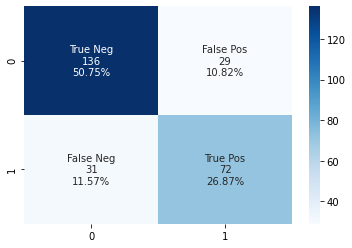

In [94]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')

In [95]:
# 12 Accuracy score

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
acc_logit = accuracy_score(Y_test,y_pred)
print("Accuracy score of Logistic Regression ",acc_logit)

Accuracy score of Logistic Regression  0.7761194029850746


In [98]:
#13 Classification report
from sklearn.metrics import classification_report

Precision : It is the number of correct positive results divided by the number of positive results predicted by the classifier.

Recall : It is the number of correct positive results divided by the number of all relevant samples

F1 Score : It is the Harmonic Mean between precision and recall.

In [99]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       165
           1       0.71      0.70      0.71       103

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



# NAIVE BAYES

Naïve Bayes is a classification method based on Bayes’ theorem that derives the probability of the given feature vector being associated with a label. Bayes models the joint distribution of the feature X and target Y, and then predicts the posterior probability given as P(y|x)

In [100]:
#Import library
from sklearn.naive_bayes import GaussianNB

In [101]:
#Create classifier
gnb = GaussianNB()

In [102]:
#train the model
gnb.fit(X_train, Y_train)

GaussianNB()

In [103]:
#predict
y_pred = gnb.predict(X_test)

In [104]:
acc_naive = accuracy_score(Y_test,y_pred)
print("Accuracy score of Naive Bayes ",acc_naive)

Accuracy score of Naive Bayes  0.7686567164179104


In [105]:
print("The confusion matrix : ",confusion_matrix(Y_test, y_pred))

The confusion matrix :  [[130  35]
 [ 27  76]]


In [106]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       165
           1       0.68      0.74      0.71       103

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



# Comparison

In [109]:
print("The accuracy score obtained with Logistic regression is ",round(acc_logit,2)," while the ccuracy score obtained with Naive Bayes is ",round(acc_naive,2))

The accuracy score obtained with Logistic regression is  0.78  while the ccuracy score obtained with Naive Bayes is  0.77


Thus, the accuracies obtained with both the classifiers are similar.